In [1]:
import pandas as pd
import numpy as np

In [15]:
whr_2017 = pd.read_csv("whr_2017.csv")
#whr_2017.head()

In [16]:
gini_index_original = pd.read_csv("gini_per_country.csv")
#gini_index_original.head()

In [17]:
gini_index = gini_index_original.rename(columns={"name": "Country"}).drop(columns="Unnamed: 0")
#gini_index.head()

In [18]:
happy_gini = pd.merge(whr_2017, gini_index, on = "Country")
#happy_gini.head()

In [22]:
happy_gini[["Country","Happiness.Rank","Happiness.Score","gini"]].sort_values(by = "gini", ascending= True)

,Country,Happiness.Rank,Happiness.Score,gini
1,Denmark,2,7.522,24.0
8,Sweden,9,7.284,25.0
0,Norway,1,7.537,25.8
36,Slovakia,40,6.098,26.0
12,Austria,13,7.006,26.0
20,Czech Republic,23,6.609,26.0
110,Ukraine,132,4.096,26.4
58,Belarus,67,5.569,26.5
4,Finland,5,7.469,26.9
63,Serbia,73,5.395,27.8


# Binning of Gini-Index

In [55]:
happy_gini.isnull().sum()
#happy_gini["gini"][2]
plot_gini = happy_gini.copy()
#happy_gini.describe()
#happy_gini["gini"][3]

In [8]:
happy_gini["gini"] = happy_gini['gini'].fillna(0)

In [12]:
gini = ["no Data","low", "middle", "high"]
cutoffs = ["0","24", "37","50","65"]

#happy_gini["grade_gini"] = pd.cut(happy_gini["gini"],cutoffs,labels = gini)
happy_gini.head(14)

# qcuts

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,gini
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,25.8
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,24.0
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.0
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,33.7
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,26.9
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,30.9
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,32.6
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,36.2
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,25.0
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,30.5


In [13]:
happy_gini.sort_values(by = "Happiness.Rank", ascending= True)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,gini
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,25.8
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,24.0
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.0
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,33.7
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,26.9
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,30.9
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,32.6
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,36.2
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,25.0
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,30.5


In [ ]:
happy_gini[["Country","Happiness.Rank","Happiness.Score","gini","grade_gini"]].sort_values(by = "Happiness.Rank", ascending= True)

In [109]:
plot_gini = happy_gini.copy()
plot_gini=plot_gini.dropna()
plot_gini.head(15)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,gini
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,25.8
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,24.0
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,33.7
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,26.9
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,30.9
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,32.6
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,36.2
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,25.0
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,30.5
10,Israel,11,7.213,7.279853,7.146146,1.375382,1.376290,0.838404,0.405989,0.330083,0.085242,2.801757,39.2


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns


In [110]:
plot_gini= plot_gini.rename(columns={"Happiness.Score": "Happiness Score" , "gini" : "Gini Index"})

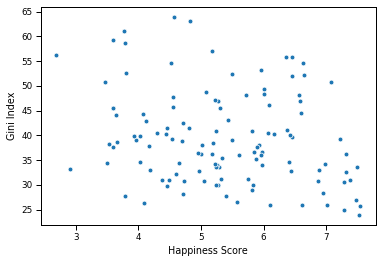

In [127]:
sns.set_context("paper")
g2 = sns.lmplot(x = 'Happiness Score', y = 'Gini Index', data=plot_gini, fit_reg=True)


g2.savefig("scatter.jpg")

In [136]:
plot_gini= plot_gini.reset_index(drop=True)

top_plot = plot_gini.head(10)
bot_plot = plot_gini.tail(10)
mid_plot = plot_gini.loc[50:60]
new_plot = pd.concat([top_plot,mid_plot, bot_plot])

new_plot= new_plot.reset_index(drop=True)

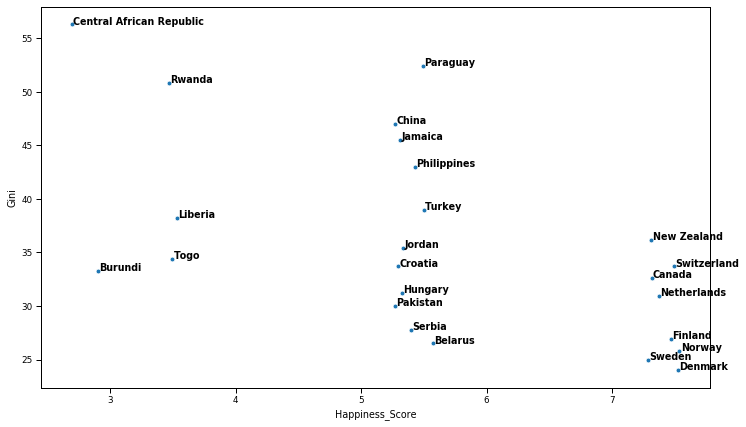

In [135]:
new_plot= new_plot.rename(columns={"Happiness Score": "Happiness_Score" , "Gini Index" : "Gini"})

plt.figure(figsize=(12,7))

g1 = sns.scatterplot('Happiness_Score', 'Gini', data=new_plot, legend=False)#, size=10)
for line in range(0,new_plot.shape[0]):
     g1.text(new_plot.Happiness_Score[line]+0.01, new_plot.Gini[line], 
     new_plot.Country[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')



In [116]:
"""plt.figure(figsize=(20,10))

g1 = sns.scatterplot('Happiness_Score', 'gini', data=plot_gini, legend=False, size=20)
for line in range(0,plot_gini.shape[0]):
     g1.text(plot_gini.Happiness_Score[line]+0.01, plot_gini.gini[line], 
     plot_gini.Country[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')"""


"plt.figure(figsize=(20,10))\n\ng1 = sns.scatterplot('Happiness_Score', 'gini', data=plot_gini, legend=False, size=20)\nfor line in range(0,plot_gini.shape[0]):\n     g1.text(plot_gini.Happiness_Score[line]+0.01, plot_gini.gini[line], \n     plot_gini.Country[line], horizontalalignment='left', \n     size='medium', color='black', weight='semibold')"

In [ ]:
"""Income share held by lowest 20% 6.7 % 
Income share held by second 20% 12 %
Income share held by third 20% 16.3 %
Income share held by fourth 20% 22.3 %
Income share held by highest 20% 42.7 %
https://tradingeconomics.com/portugal/gini-index-wb-data.html"""

#arr = np.array([6.7, 12,16.3, 22.3 , 42.7 ])

0.32920000000000016


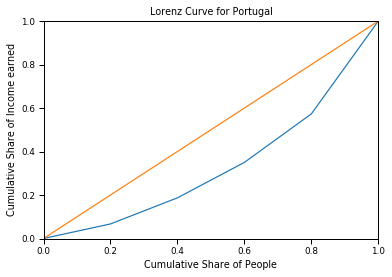

In [158]:
#arr = ([1,4,6,9,100])

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
print(gini(arr))

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve, )
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.xlabel("Cumulative Share of People")
plt.ylabel("Cumulative Share of Income earned")
plt.title ("Lorenz Curve for Portugal")
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig("lorenz.jpg")
plt.show()